In [0]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
X1=[]
for num in range (1,101):
  X1.append((((num*2)*5)-1)/100)

In [0]:
X1

In [0]:
X2=X1[::-1]

In [0]:
X2

In [0]:
data = np.column_stack((X1, X2))

In [0]:
data

In [0]:
target = [(x1*x2)/5 for x1,x2 in zip(X1,X2)]

In [0]:
target


In [0]:
data = np.array(data,dtype=float)
target = np.array(target,dtype=float)

In [68]:
data = np.array(data).reshape(100, 2,1)
data.shape

(100, 2, 1)

In [69]:
target.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=4)

In [0]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(2,1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

In [72]:
history = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/500
80/80 [==============================] - 4s 55ms/step - loss: 13.8277 - val_loss: 13.7880
Epoch 2/500
80/80 [==============================] - 0s 1ms/step - loss: 13.6998 - val_loss: 13.6597
Epoch 3/500
80/80 [==============================] - 0s 1ms/step - loss: 13.5614 - val_loss: 13.5141
Epoch 4/500
80/80 [==============================] - 0s 964us/step - loss: 13.4003 - val_loss: 13.3422
Epoch 5/500
80/80 [==============================] - 0s 976us/step - loss: 13.2029 - val_loss: 13.1248
Epoch 6/500
80/80 [==============================] - 0s 1ms/step - loss: 12.9376 - val_loss: 12.8291
Epoch 7/500
80/80 [==============================] - 0s 989us/step - loss: 12.5516 - val_loss: 12.3863
Epoch 8/500
80/80 [==============================] - 0s 1ms/step - loss: 11.9182 - val_loss: 11.6531
Epoch 9/500
80/80 [==============================] - 0s 967us/step - loss: 10.6502 - val_loss: 10.5051
Epoch 10/500
80/80 [==================

In [0]:
results = model.predict(x_test)

In [74]:
results.shape

(20, 1)

In [75]:
y_test.shape

(20,)

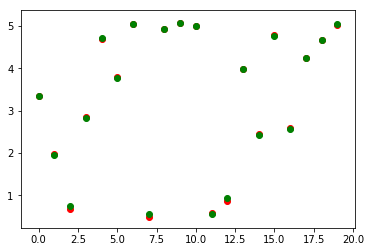

In [76]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

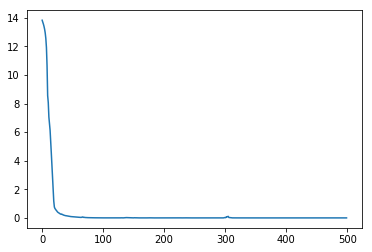

In [77]:
plt.plot(history.history['loss'])
plt.show()